<a href="https://colab.research.google.com/github/ShrutiRajput1234/NNDL_Lab/blob/main/BMW_car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Training And Testing Available Data**

*We have a dataset containing prices of used BMW cars. We are going to analyze this dataset and build a prediction function that can predict a price by taking mileage and age of the car as input. We will use sklearn train_test_split method to split training and testing dataset*

In [1]:
import pandas as pd
df = pd.read_csv("/bmw.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

**Car Mileage Vs Sell Price ($)**

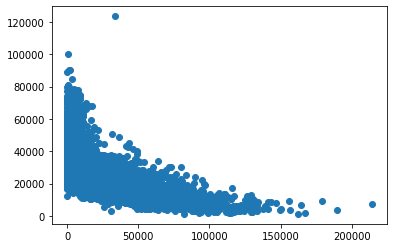

In [5]:
plt.scatter(df['mileage'],df['price'])

**Car Age Vs Sell Price ($)**

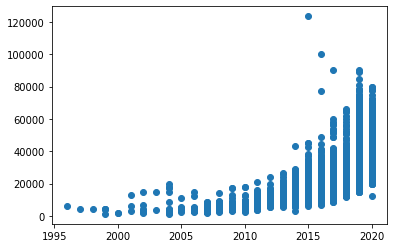

In [7]:
plt.scatter(df['year'],df['price'])

Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)

*The approach we are going to use here is to split available data in two sets*

1. Training: We will train our model on this dataset
2. Testing: We will use this subset to make actual predictions using trained model

The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.

In [9]:
X = df[['mileage','year']]

In [10]:
y = df['price']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

In [12]:
X_train

,mileage,year
8640,39891,2016
1621,3000,2019
9767,41000,2012
1212,34247,2017
5927,4255,2019
...,...,...
5688,61676,2015
5905,1299,2019
601,82681,2014
5833,7583,2019


In [13]:
X_test

,mileage,year
9579,56044,2016
4956,54000,2017
10614,86735,2017
8366,58024,2013
7026,4560,2019
...,...,...
5234,4500,2020
3645,16260,2016
4708,8027,2019
7806,31328,2017


In [14]:
y_train

8640    18100
1621    26612
9767     8995
1212    17484
5927    34995
        ...  
5688    10690
5905    35600
601      9998
5833    30140
1709    34222
Name: price, Length: 7546, dtype: int64

In [15]:
y_test

9579      9749
4956     33500
10614    12500
8366     15499
7026     20657
         ...  
5234     33495
3645     13998
4708     36750
7806     26500
6281     10792
Name: price, Length: 3235, dtype: int64

**Lets run linear regression model now**

In [16]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [17]:
X_test

,mileage,year
9579,56044,2016
4956,54000,2017
10614,86735,2017
8366,58024,2013
7026,4560,2019
...,...,...
5234,4500,2020
3645,16260,2016
4708,8027,2019
7806,31328,2017


In [18]:
clf.predict(X_test)

array([16477.08294639, 18626.34079199, 14167.15101602, ...,
       28630.46710688, 21714.74007718, 13356.74145321])

In [19]:
y_test

9579      9749
4956     33500
10614    12500
8366     15499
7026     20657
         ...  
5234     33495
3645     13998
4708     36750
7806     26500
6281     10792
Name: price, Length: 3235, dtype: int64

In [20]:
clf.score(X_test, y_test)

0.4345288841558672

**random_state argument**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,mileage,year
5128,5500,2020
4976,34697,2017
4856,37000,2016
2479,11,2020
4304,4155,2019
...,...,...
433,14052,2018
392,48697,2016
2785,11,2019
4033,105,2019
